## import the libraries

In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/d9/64/7fdfb9386511cd6805451e012c537073a79a958a58795c4e602e538c388c/opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 165.2 kB/s eta 0:00:00m eta 0:00:010:00:11


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2 as cv
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## load data

In [43]:
image_cat = "/home/pc15/Cat vs dog/archive/PetImages/Cat"
image_dog = "/home/pc15/Cat vs dog/archive/PetImages/Dog"
image_list = []
count = 0

for filename in os.listdir(image_cat):
    if count == 1246:
        break
    try:
        img = cv.imread(f"/home/pc15/Cat vs dog/archive/PetImages/Cat/{filename}")
        img_resized = cv.resize(img, (150, 150))
        img_array = np.array(img_resized)
        image_list.append(img_array)
        count += 1
    except Exception as e:
        print(f'Error (cat): {e} {filename}')

for image in os.listdir(image_dog):
    if count == 845:
        break
    try:
        img2 = cv.imread(f"/home/pc15/Cat vs dog/archive/PetImages/Dog/{image}")
        img2 = cv.resize(img2, (150, 150))
        img_array2 = np.array(img2)
        image_list.append(img_array2)
        count += 1
    except Exception as e:
        print(f'Error (dog): {e}')



Error (cat): OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
 11874.jpg
Error (cat): OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
 9778.jpg
Error (cat): OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
 7978.jpg
Error (dog): OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



Error (dog): OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [44]:
len(image_cat)

43

In [45]:
len(image_dog)

43

In [46]:
len(image_list)

2086

In [23]:
np.array(image_list).shape

(845, 150, 150, 3)

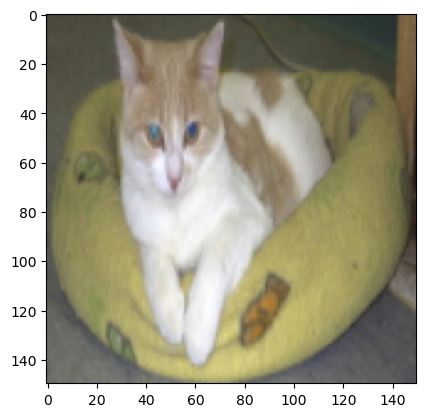

In [20]:
plt.imshow(image_list[844][:,:,::-1])

## create labels

In [47]:
label_list = []
for i in range(1246):
    label_list.append(1)
for j in range(845):
    label_list.append(0)

In [48]:
label_list[844]

1

## rajdomize labels and images

In [51]:
combined = list(zip(label_list, image_list))
random.shuffle(combined)
shuffled_labels, shuffled_images = zip(*combined)

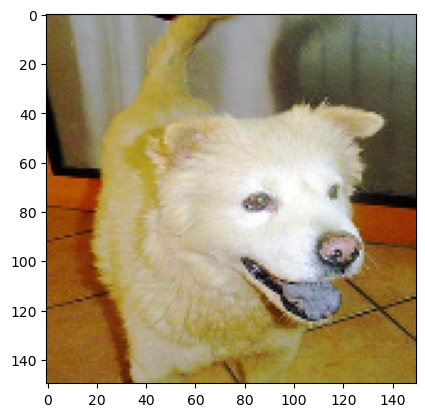

In [52]:
plt.imshow(shuffled_images[700][:,:,::-1])

In [53]:
shuffled_labels[700]

0

In [54]:
image_array = np.array(shuffled_images) 
labels_array = np.array(shuffled_labels)

## split data for test and validation

In [55]:
x_train, x_test, y_train, y_test = train_test_split(image_array, labels_array, test_size=0.2)

In [56]:
x_train1, x_validation, y_train1, y_validation = train_test_split(x_train, y_train, test_size=0.15)

## augmentation data model

In [57]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.2)
])

## callback

In [58]:
callback = keras.callbacks.EarlyStopping(patience=4, monitor='val_loss')

## CNN model

In [59]:
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=output)

In [37]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         6,401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 984,897 (3.76 MB)

 Trainable params: 984,897 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [61]:
history = model.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=20, callbacks=callback)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.5471 - loss: 0.7010 - val_accuracy: 0.6096 - val_loss: 0.6758
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - accuracy: 0.5706 - loss: 0.6855 - val_accuracy: 0.6096 - val_loss: 0.6702
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.5650 - loss: 0.6885 - val_accuracy: 0.6096 - val_loss: 0.6786
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.5838 - loss: 0.6784 - val_accuracy: 0.6653 - val_loss: 0.6885
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.5959 - loss: 0.6777 - val_accuracy: 0.6096 - val_loss: 0.6514
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.5805 - loss: 0.6767 - val_accuracy: 0.6375 - val_loss: 0.6509
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.6009 - loss: 0.6705 - val_accuracy: 0.6932 - val_loss: 0.6178
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.6112 - loss: 0.6585 - val_accuracy: 0.

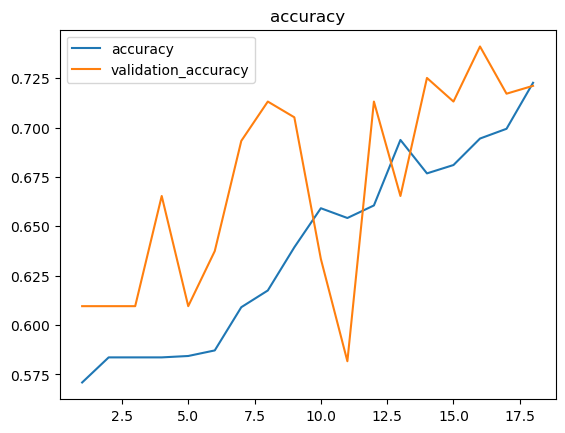

In [62]:
my_dict = history.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

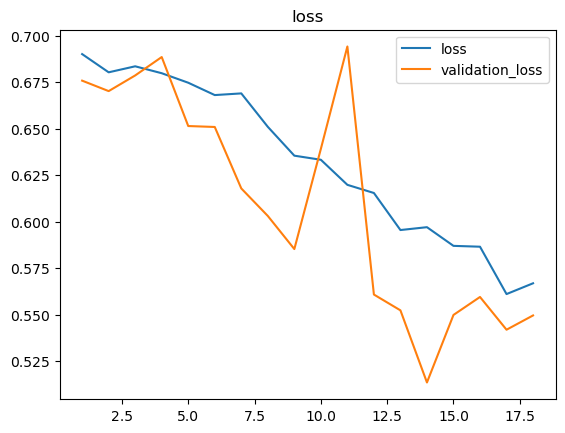

In [63]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

In [64]:
model.evaluate(x_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7194 - loss: 0.5889


[0.5542728304862976, 0.7105262875556946]

In [23]:
y_pred = model.predict(x_test)

150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


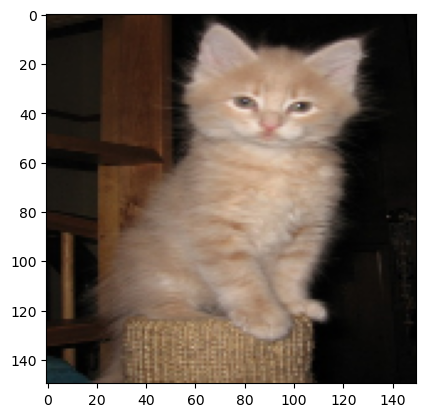

In [65]:
plt.imshow(x_test[100][:,:,::-1])

In [66]:
y_test[100]

1

In [67]:
xception_bace = keras.applications.vgg16.VGG16(include_top=False)
x = keras.layers.GlobalAveragePooling2D()(xception_bace.output)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model2 = keras.Model(inputs=xception_bace.input, outputs=output)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [68]:
for layer in xception_bace.layers:
  layer.trainable = False

In [69]:
model2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [71]:
history2 = model2.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=5, callbacks=callback)

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 31s 702ms/step - accuracy: 0.9207 - loss: 0.4374 - val_accuracy: 0.9363 - val_loss: 0.3835
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 34s 750ms/step - accuracy: 0.9298 - loss: 0.2837 - val_accuracy: 0.9402 - val_loss: 0.3641
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 35s 783ms/step - accuracy: 0.9428 - loss: 0.2385 - val_accuracy: 0.9442 - val_loss: 0.3256
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 35s 786ms/step - accuracy: 0.9622 - loss: 0.1599 - val_accuracy: 0.9522 - val_loss: 0.3123
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 35s 790ms/step - accuracy: 0.9669 - loss: 0.1421 - val_accuracy: 0.9522 - val_loss: 0.2964


In [72]:
model2.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,716,229 (56.14 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,028 (4.02 KB)

In [75]:
model2.evaluate(x_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 693ms/step - accuracy: 0.9518 - loss: 0.1870


[0.20852874219417572, 0.9449760913848877]

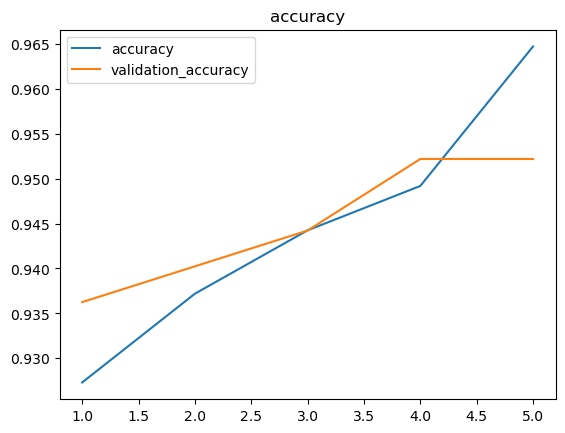

In [74]:
my_dict = history2.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

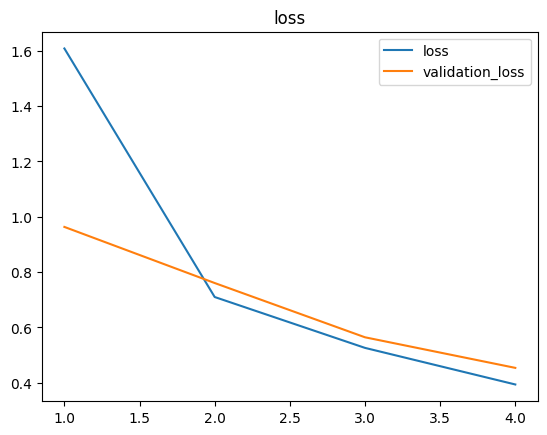

In [32]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()